In [1]:
# Principal Component Analysis Algorithm for Wine Dataset
# PCA is a unsupervised learning because it will find variance from indepedent attributes

In [2]:
# Load csv file

import pandas as pd
dataset=pd.read_csv('Wine.csv')

In [3]:
# Descriptive head of a dataset
print(dataset.head(2))
# Descriptive shape of a dataset
print(dataset.shape)
# Descriptive datatype for each attribute in a dataset
print(dataset.dtypes)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
(178, 14)
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Custo

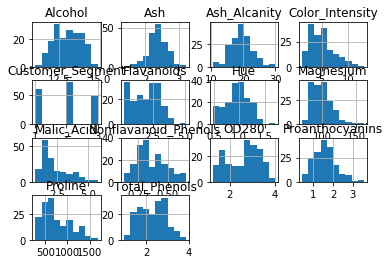

In [5]:
# Visualistion plot for each attribute in dataset to find what kind of distribution for each attribute.

import matplotlib.pyplot as plt
# Histogram visualisation plot
dataset.hist()
plt.show()

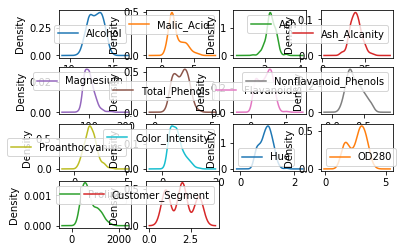

In [7]:
# As per Histogram visualisation graph look not smooth, so we are applying smooth density plot

# Density plot visualisation
dataset.plot(kind='density',sharex=False,sharey=False,subplots=True,layout=(4,4))
plt.show()

In [8]:
# As per above smooth curve all attribute having different distribution so we need to apply 
# feature scaling to keep all in same scale distribution

In [9]:
# Split the dataset into input and output attribute
array=dataset.values
x=array[:,:-1]
y=array[:,-1]
print("------------------ x Input Attribute --------------")
print(x[:2,:])
print("------------------ y Output Attribute--------------")
print(y[:2,])

------------------ x Input Attribute --------------
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]]
------------------ y Output Attribute--------------
[1. 1.]


In [10]:
# Applying Standard Scaler
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)
print(x[:2,:])

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]]


In [13]:
# Applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x=pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [14]:
# As per the above n_components we are 0.36+0.19+0.11+0.070+0.065+0.049+0.042=88.62 percent
# So We use 7=n_components even we can use much less as

pca=PCA(n_components=7)
x=pca.fit_transform(x)
print(x[:3,:])

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119  0.69304284 -0.22388013
   0.59642655]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832 -0.25765463 -0.92712024
   0.05377561]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231 -0.25103312  0.54927605
   0.42420545]]


In [15]:
# Split the dataset into train and test set
train_size=0.80
test_size=0.20
seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

In [16]:
# Logistic Regression Classification Algorithm for Wine Dataset
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# Predict the accuracy of model for unseen dataset
y_pred=logistic.predict(x_test)
print(y_pred[:4,])

[1. 2. 1. 1.]


In [18]:
# Evaluate Performance metrics of an algorithm
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,logistic.predict(x_test))
print(confusion)

[[16  1  0]
 [ 0 11  0]
 [ 0  0  8]]


In [19]:
# As per the above Confusion matrix we got only 1 incorrect prediction
# We achived accuracy more than 98%

In [22]:
# Evalute performance metrics for classifier
def classification_accuracy(actual,predicted):
    correct=0.0
    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            correct+=1
    return correct/float(len(actual))*100.0

In [23]:
# Accuracy in percentage
accuracy=classification_accuracy(y_test,logistic.predict(x_test))
print(accuracy)

97.2222222222


In [ ]:
# We got 97.22% accuracy